# Bank Loan Prediction:- using Decision Tree Algorithm

In this data set from kaggle, I am supposed to predict wheather a person will be able to pay their load back using machine learning algorithms/ models.

### Machine Learning: deceision tree

* 1 - Ingest / upload the data set.
* 2 - Clean, deal with missing values
* 3 - Choose the right attributes to use in my deployment
* 4 - Scale the features so that they can be represented properly.
* 5 - Invoke the k-means closer
* 6 - Check clusters (optional).


In [1]:
#Let us look at the information that is provided in the folder
!ls

Bank Loan Prediction.ipynb bureau_balance.csv
POS_CASH_balance.csv       credit_card_balance.csv
application_test.csv       installments_payments.csv
application_train.csv


In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'
warnings.filterwarnings('ignore')

In [3]:
#I need to import the datasets 
test_data = pd.read_csv('./application_test.csv')
train_data = pd.read_csv('./application_train.csv')
credit_data = pd.read_csv('./credit_card_balance.csv')
POS_data = pd.read_csv('./POS_CASH_balance.csv')
Instalments_data = pd.read_csv('./installments_payments.csv')

In [4]:
data_list = [test_data,train_data,credit_data,POS_data,Instalments_data]

In [5]:
#I would like to see the shape of the data, how many rows and columns
shape =[ data.shape for data in data_list]
shape

[(48744, 121), (307511, 122), (3840312, 23), (10001358, 8), (13605401, 8)]

### Pre Analysis data Processing:
In this instance I want to look at the data and see what is included in it specifically each csv at a time, take out what I think maybe useful columns.

In [6]:
#what variables does the data have:
test_data.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

### Credit Info

In [7]:
credit_data.head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.500,0.0,877.500,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.000,0.0,0.000,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
5,2646502,380010,-7,82903.815,270000,0.0,0.000,0.0,0.000,4449.105,...,82773.315,82773.315,0.0,0,0.0,0.0,2.0,Active,7,0
6,1079071,171320,-6,353451.645,585000,67500.0,67500.000,0.0,0.000,14684.175,...,351881.145,351881.145,1.0,1,0.0,0.0,6.0,Active,0,0
7,2095912,118650,-7,47962.125,45000,45000.0,45000.000,0.0,0.000,0.000,...,47962.125,47962.125,1.0,1,0.0,0.0,51.0,Active,0,0
8,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.500,...,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0
9,1235299,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.340,...,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0


In [8]:
credit_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [9]:
creditFeatures = ['MONTHS_BALANCE','AMT_BALANCE','AMT_DRAWINGS_ATM_CURRENT','AMT_INST_MIN_REGULARITY','AMT_TOTAL_RECEIVABLE']

In [10]:
Credit = credit_data[creditFeatures]
Credit.head()

,MONTHS_BALANCE,AMT_BALANCE,AMT_DRAWINGS_ATM_CURRENT,AMT_INST_MIN_REGULARITY,AMT_TOTAL_RECEIVABLE
0,-6,56.970,0.0,1700.325,0.000
1,-1,63975.555,2250.0,2250.000,64875.555
2,-7,31815.225,0.0,2250.000,31460.085
3,-4,236572.110,2250.0,11795.760,233048.970
4,-1,453919.455,0.0,22924.890,453919.455


### POS Data

In [11]:
POS_data.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


## Installments Data

In [12]:
Instalments_data.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [13]:
InstalFeatures = ['NUM_INSTALMENT_NUMBER','AMT_INSTALMENT']

In [14]:
Installments = Instalments_data[InstalFeatures]
Installments.head(5)

,NUM_INSTALMENT_NUMBER,AMT_INSTALMENT
0,6,6948.360
1,34,1716.525
2,1,25425.000
3,3,24350.130
4,2,2165.040


### Test Data

In [15]:

#what variables does the data have:
test_data.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [16]:
#how many rows and columns do we have?
test_data.shape

(48744, 121)

In [17]:
test_data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [18]:
#choose the features that I need to use in my analysis from this test data
testFeatures = test_data.iloc[:,2:9]
testFeatures

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
0,F,N,Y,0,135000.0,568800.0,20560.5
1,M,N,Y,0,99000.0,222768.0,17370.0
2,M,Y,Y,0,202500.0,663264.0,69777.0
3,F,N,Y,2,315000.0,1575000.0,49018.5
4,M,Y,N,1,180000.0,625500.0,32067.0
5,F,Y,Y,0,270000.0,959688.0,34600.5
6,M,Y,Y,2,180000.0,499221.0,22117.5
7,M,N,Y,0,166500.0,180000.0,14220.0
8,F,N,Y,0,315000.0,364896.0,28957.5
9,F,Y,Y,1,162000.0,45000.0,5337.0


In [19]:
#what is the shape of the data
testFeatures.shape

(48744, 7)

In [20]:
#do we have any empty values?
testFeatures.isnull().any().sum

<bound method Series.sum of CODE_GENDER         False
FLAG_OWN_CAR        False
FLAG_OWN_REALTY     False
CNT_CHILDREN        False
AMT_INCOME_TOTAL    False
AMT_CREDIT          False
AMT_ANNUITY          True
dtype: bool>

In [21]:
testFeatures = testFeatures.dropna()
testFeatures.shape

(48720, 7)

In [22]:
#what does our info look like? are they all integers or others are not?
testFeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48720 entries, 0 to 48743
Data columns (total 7 columns):
CODE_GENDER         48720 non-null object
FLAG_OWN_CAR        48720 non-null object
FLAG_OWN_REALTY     48720 non-null object
CNT_CHILDREN        48720 non-null int64
AMT_INCOME_TOTAL    48720 non-null float64
AMT_CREDIT          48720 non-null float64
AMT_ANNUITY         48720 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 3.0+ MB


In [23]:
dummies = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']

In [24]:
# Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [25]:
cl_testDf = dummy_df(testFeatures,dummies)
cl_testDf.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
0,0,135000.0,568800.0,20560.5,1,0,1,0,0,1
1,0,99000.0,222768.0,17370.0,0,1,1,0,0,1
2,0,202500.0,663264.0,69777.0,0,1,0,1,0,1
3,2,315000.0,1575000.0,49018.5,1,0,1,0,0,1
4,1,180000.0,625500.0,32067.0,0,1,0,1,1,0


In [26]:
#how skewed is the data, the closer to 0 the column is the more useful it is for this
cl_testDf.skew()

CNT_CHILDREN         2.367122
AMT_INCOME_TOTAL     5.303023
AMT_CREDIT           1.649017
AMT_ANNUITY          1.474372
CODE_GENDER_F       -0.725233
CODE_GENDER_M        0.725233
FLAG_OWN_CAR_N      -0.688692
FLAG_OWN_CAR_Y       0.688692
FLAG_OWN_REALTY_N    0.824898
FLAG_OWN_REALTY_Y   -0.824898
dtype: float64

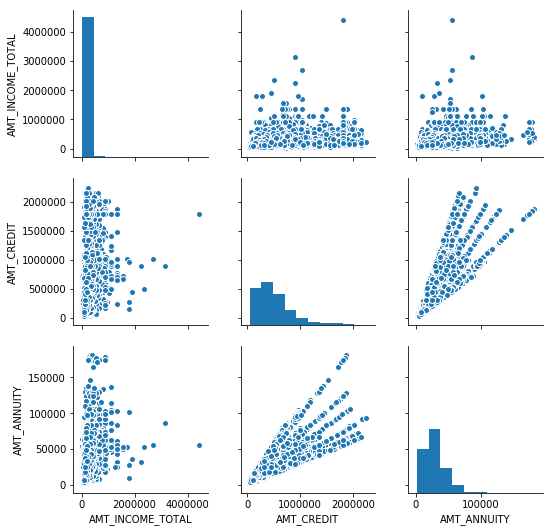

In [27]:
h = cl_testDf.ix[:,1:4]
sns.pairplot(h)

## Train data

In [28]:
#this is the provided training data, how many variables does it have.
train_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [29]:
train_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#the y value
y = train_data.iloc[:,1]
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [31]:
trainFeatures = test_data.iloc[:,2:9]
trainFeatures.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
0,F,N,Y,0,135000.0,568800.0,20560.5
1,M,N,Y,0,99000.0,222768.0,17370.0
2,M,Y,Y,0,202500.0,663264.0,69777.0
3,F,N,Y,2,315000.0,1575000.0,49018.5
4,M,Y,N,1,180000.0,625500.0,32067.0


In [32]:
dummies1 = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']

In [33]:
cl_train = dummy_df(trainFeatures,dummies1)

In [34]:
#any mising values
cl_train.isnull().any()

CNT_CHILDREN         False
AMT_INCOME_TOTAL     False
AMT_CREDIT           False
AMT_ANNUITY           True
CODE_GENDER_F        False
CODE_GENDER_M        False
FLAG_OWN_CAR_N       False
FLAG_OWN_CAR_Y       False
FLAG_OWN_REALTY_N    False
FLAG_OWN_REALTY_Y    False
dtype: bool

In [38]:
cl_train =cl_train.dropna()

In [39]:
cl_train.isnull().any().sum()

0

We not have a clean train data set split in values of target result and  test

In [40]:
X = cl_train

In [43]:
X.shape,y.shape

((48720, 10), (307511,))

In [46]:
#lets take the top 48720 of y
y = y[:48720]

### Feature Selection

In [47]:
#let us now split the data into training 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((36540, 10), (36540,), (12180, 10), (12180,))

In [48]:
#let us scale the data:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = pd.DataFrame(scaler.fit_transform(X))

In [49]:
Xs #scaled values

,0,1,2,3,4,5,6,7,8,9
0,-0.560003,-0.427728,0.142508,-0.553548,0.701107,-0.701107,0.713288,-0.713288,-0.669277,0.669277
1,-0.560003,-0.782322,-0.804578,-0.752753,-1.426317,1.426317,0.713288,-0.713288,-0.669277,0.669277
2,-0.560003,0.237136,0.401055,2.519371,-1.426317,1.426317,-1.401959,1.401959,-0.669277,0.669277
3,2.260563,1.345243,2.896465,1.223277,0.701107,-0.701107,0.713288,-0.713288,-0.669277,0.669277
4,0.850280,0.015515,0.297695,0.164881,-1.426317,1.426317,-1.401959,1.401959,1.494150,-1.494150
5,-0.560003,0.902000,1.212363,0.323064,0.701107,-0.701107,-1.401959,1.401959,-0.669277,0.669277
6,2.260563,0.015515,-0.047929,-0.456334,-1.426317,1.426317,-1.401959,1.401959,-0.669277,0.669277
7,-0.560003,-0.117458,-0.921633,-0.949428,-1.426317,1.426317,0.713288,-0.713288,-0.669277,0.669277
8,-0.560003,1.345243,-0.415575,-0.029267,0.701107,-0.701107,0.713288,-0.713288,-0.669277,0.669277
9,0.850280,-0.161782,-1.291126,-1.504054,0.701107,-0.701107,-1.401959,1.401959,-0.669277,0.669277


In [50]:
#the accuracy score is quite low lets reduce the dimensions with PCA
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

In [51]:
var= pca.explained_variance_ratio_
var

array([2.89615680e-01, 2.02811953e-01, 1.92226615e-01, 1.31698521e-01,
       9.76141630e-02, 6.46350939e-02, 2.13979727e-02, 2.50919534e-33,
       1.11911745e-33, 2.24667866e-34])

Text(0,0.5,'YValue')

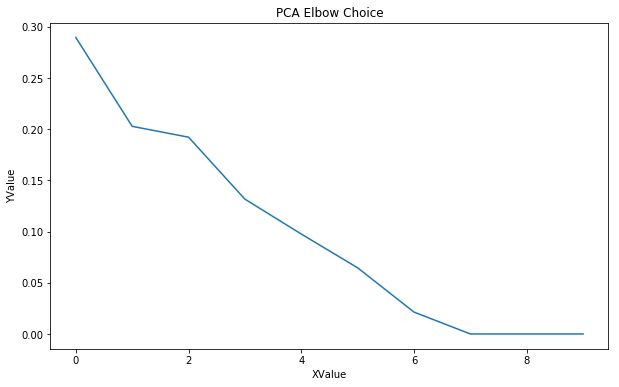

In [52]:
plt.figure(figsize = (10,6))
plt.plot(var)
plt.title("PCA Elbow Choice")
plt.xlabel("XValue")
plt.ylabel("YValue")

In [57]:
from sklearn.tree import DecisionTreeClassifier
loan_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
loan_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [58]:
predictions = loan_classifier.predict(X_test)

In [59]:
predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
y_test[:20]

45009    0
22622    0
34278    1
17944    0
22399    0
14236    0
29143    0
24470    0
26070    0
39686    0
21799    0
48183    0
34159    1
34901    0
39991    0
41102    0
21019    0
21589    0
19687    0
34981    0
Name: TARGET, dtype: int64

In [62]:
#the accuracy of the predictions?
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

91.9471811713191